In [2]:
from IPython.core import logger
import os
import logging
from typing import Dict, List, Any, Tuple
from pathlib import Path

import numpy as np
import polars as pl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [3]:
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / 'data' / 'raw'

In [5]:
def load_data(
    transactions_path: str,
    accounts_path: str,
) -> Tuple[pl.DataFrame, pl.DataFrame]:

    """
    load dataset
    """
    print(f"   Loading Transactions from: {transactions_path}")
    df_trans = pl.scan_csv(transactions_path, try_parse_dates=True)
    print("   Loaded Transactions Data!")
    print(f"  Dataset Shape: {df_trans.collect().shape}")
    pl.Config.set_tbl_cols(-1)
    print(df_trans.head(4).collect())


    print(f"   Loading Accounts from: {accounts_path}")
    df_accounts = pl.scan_csv(accounts_path)
    print("   Loaded Accounts Data!")
    print(f" Dataset Shape: {df_accounts.collect().shape}")
    print(df_accounts.head().collect())


    return df_trans, df_accounts

trans, details = load_data(DATA_DIR / 'HI-Medium_Trans.csv', DATA_DIR / 'HI-Medium_accounts.csv')


   Loading Transactions from: e:\AML\data\raw\HI-Medium_Trans.csv
   Loaded Transactions Data!
  Dataset Shape: (31898238, 11)
shape: (4, 11)
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Timest ┆ From   ┆ Accoun ┆ To     ┆ Accoun ┆ Amount ┆ Receiv ┆ Amount ┆ Paymen ┆ Paymen ┆ Is Lau │
│ amp    ┆ Bank   ┆ t      ┆ Bank   ┆ t_dupl ┆ Receiv ┆ ing    ┆ Paid   ┆ t Curr ┆ t      ┆ nderin │
│ ---    ┆ ---    ┆ ---    ┆ ---    ┆ icated ┆ ed     ┆ Curren ┆ ---    ┆ ency   ┆ Format ┆ g      │
│ dateti ┆ i64    ┆ str    ┆ i64    ┆ _0     ┆ ---    ┆ cy     ┆ f64    ┆ ---    ┆ ---    ┆ ---    │
│ me[μs] ┆        ┆        ┆        ┆ ---    ┆ f64    ┆ ---    ┆        ┆ str    ┆ str    ┆ i64    │
│        ┆        ┆        ┆        ┆ str    ┆        ┆ str    ┆        ┆        ┆        ┆        │
╞════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│ 2022-0 ┆ 20     ┆ 800104 ┆ 20     ┆ 800104 ┆ 679

In [46]:
print("Transactions Schema:")
trans.schema

Transactions Schema:


Schema([('Timestamp', Datetime(time_unit='us', time_zone=None)),
        ('From Bank', Int64),
        ('Account', String),
        ('To Bank', Int64),
        ('Account_duplicated_0', String),
        ('Amount Received', Float64),
        ('Receiving Currency', String),
        ('Amount Paid', Float64),
        ('Payment Currency', String),
        ('Payment Format', String),
        ('Is Laundering', Int64)])

In [47]:
print("Accounts Schema:")
details.schema

Accounts Schema:


Schema([('Bank Name', String),
        ('Bank ID', Int64),
        ('Account Number', String),
        ('Entity ID', String),
        ('Entity Name', String)])

In [48]:
print("Transactions data description:")
print(trans.describe())

Transactions data description:
shape: (9, 12)
┌────────┬────────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ statis ┆ Timest ┆ From   ┆ Accou ┆ To    ┆ Accou ┆ Amoun ┆ Recei ┆ Amoun ┆ Payme ┆ Payme ┆ Is    │
│ tic    ┆ amp    ┆ Bank   ┆ nt    ┆ Bank  ┆ nt_du ┆ t Rec ┆ ving  ┆ t     ┆ nt    ┆ nt    ┆ Laund │
│ ---    ┆ ---    ┆ ---    ┆ ---   ┆ ---   ┆ plica ┆ eived ┆ Curre ┆ Paid  ┆ Curre ┆ Forma ┆ ering │
│ str    ┆ str    ┆ f64    ┆ str   ┆ f64   ┆ ted_0 ┆ ---   ┆ ncy   ┆ ---   ┆ ncy   ┆ t     ┆ ---   │
│        ┆        ┆        ┆       ┆       ┆ ---   ┆ f64   ┆ ---   ┆ f64   ┆ ---   ┆ ---   ┆ f64   │
│        ┆        ┆        ┆       ┆       ┆ str   ┆       ┆ str   ┆       ┆ str   ┆ str   ┆       │
╞════════╪════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ count  ┆ 318982 ┆ 3.1898 ┆ 31898 ┆ 3.189 ┆ 31898 ┆ 3.189 ┆ 31898 ┆ 3.189 ┆ 31898 ┆ 31898 ┆ 3.189 │
│        ┆ 38     ┆ 238e7  ┆ 238   ┆ 8238e ┆ 

In [49]:
print("Accounts data description:")
print(details.describe())

Accounts data description:


shape: (9, 6)
┌────────────┬───────────────┬───────────────┬────────────────┬─────────────┬──────────────────────┐
│ statistic  ┆ Bank Name     ┆ Bank ID       ┆ Account Number ┆ Entity ID   ┆ Entity Name          │
│ ---        ┆ ---           ┆ ---           ┆ ---            ┆ ---         ┆ ---                  │
│ str        ┆ str           ┆ f64           ┆ str            ┆ str         ┆ str                  │
╞════════════╪═══════════════╪═══════════════╪════════════════╪═════════════╪══════════════════════╡
│ count      ┆ 2087786       ┆ 2.087786e6    ┆ 2087786        ┆ 2087786     ┆ 2087786              │
│ null_count ┆ 0             ┆ 0.0           ┆ 0              ┆ 0           ┆ 0                    │
│ mean       ┆ null          ┆ 632102.369434 ┆ null           ┆ null        ┆ null                 │
│ std        ┆ null          ┆ 970374.552963 ┆ null           ┆ null        ┆ null                 │
│ min        ┆ Acme Bancorp  ┆ 0.0           ┆ 100428660      ┆ 2AA1CA62570 ┆

In [50]:
#check if Account_duplicated_0 is actually the counterparty (receiver)
check_unique = trans.select([
    pl.col('Account').n_unique().alias('unique_senders'),
    pl.col('Account_duplicated_0').n_unique().alias('unique_counters')
])
print('Entity Uniqueness Check:')
print(check_unique.collect())

Entity Uniqueness Check:


shape: (1, 2)
┌────────────────┬─────────────────┐
│ unique_senders ┆ unique_counters │
│ ---            ┆ ---             │
│ u32            ┆ u32             │
╞════════════════╪═════════════════╡
│ 2013627        ┆ 1689925         │
└────────────────┴─────────────────┘


In [51]:
#class distruution (is laundering)
class_dist = trans.group_by('Is Laundering').agg([pl.count().alias('count')]).sort('Is Laundering').collect()
print("Class Distribution:")
print(class_dist)

Class Distribution:
shape: (2, 2)
┌───────────────┬──────────┐
│ Is Laundering ┆ count    │
│ ---           ┆ ---      │
│ i64           ┆ u32      │
╞═══════════════╪══════════╡
│ 0             ┆ 31863008 │
│ 1             ┆ 35230    │
└───────────────┴──────────┘


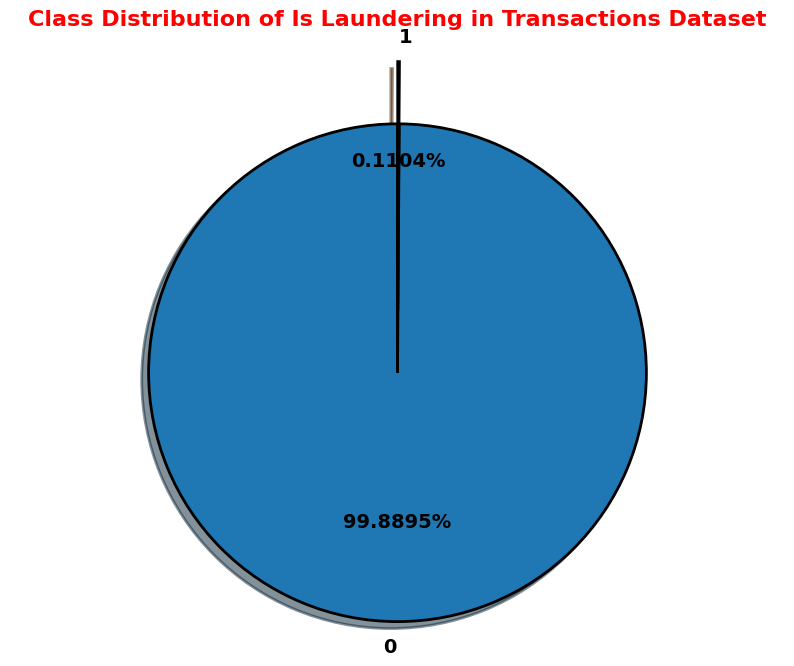

In [52]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,8))
plt.pie(
    class_dist['count'],
    labels=class_dist['Is Laundering'],
    startangle=90,
    autopct='%1.4f%%',
    explode=[0, 0.25],
    shadow=True,
    textprops={'fontsize': 14, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 2}
)
plt.title(
    'Class Distribution of Is Laundering in Transactions Dataset',
    fontsize=16,
    fontweight='bold',
    color='r'
)
plt.axis('equal')
plt.show()

In [53]:
#EDA: Transactions Data
#temporal range
print('Temporal Range of Transactions Data:')
temp_cov = trans.select([
    pl.col('Timestamp').min().alias('start_date'),
    pl.col('Timestamp').max().alias('end_date'),
    (pl.col('Timestamp').max() - pl.col('Timestamp').min()).alias('duration')
])
print(temp_cov.collect())

Temporal Range of Transactions Data:
shape: (1, 3)
┌─────────────────────┬─────────────────────┬──────────────┐
│ start_date          ┆ end_date            ┆ duration     │
│ ---                 ┆ ---                 ┆ ---          │
│ datetime[μs]        ┆ datetime[μs]        ┆ duration[μs] │
╞═════════════════════╪═════════════════════╪══════════════╡
│ 2022-09-01 00:00:00 ┆ 2022-09-28 15:58:00 ┆ 27d 15h 58m  │
└─────────────────────┴─────────────────────┴──────────────┘


In [54]:
temp_feat = trans.with_columns([
    pl.col('Timestamp').dt.hour().alias('hour'),
    pl.col('Timestamp').dt.weekday().alias('day_of_week'),
    (pl.col('Timestamp').dt.weekday() > 5).alias('is_weekend')
])

#fraud rate by hour
f_hour = temp_feat.group_by('hour').agg([
    pl.count().alias('total_txns'),
    pl.col('Is Laundering').sum().alias('fraud_txns')
]).with_columns([
    (pl.col('fraud_txns') / pl.col('total_txns') * 100).alias('fraud_rate_percent')
])

print('Risk Profile by Hour:')
pl.Config.set_tbl_rows(-1)
print(f_hour.sort('hour').collect())

print('''
\n\n
As volume drops off in the evening, the criminals stop too.
This suggests the fraudsters are synchronized with the banking system's active hours
(perhaps to ensure immediate confirmation of transfers), rather than operating completely autonomously at night.
      '''
    )

Risk Profile by Hour:
shape: (24, 4)
┌──────┬────────────┬────────────┬────────────────────┐
│ hour ┆ total_txns ┆ fraud_txns ┆ fraud_rate_percent │
│ ---  ┆ ---        ┆ ---        ┆ ---                │
│ i8   ┆ u32        ┆ i64        ┆ f64                │
╞══════╪════════════╪════════════╪════════════════════╡
│ 0    ┆ 3372880    ┆ 1102       ┆ 0.032672           │
│ 1    ┆ 1238053    ┆ 1025       ┆ 0.082791           │
│ 2    ┆ 1237519    ┆ 1071       ┆ 0.086544           │
│ 3    ┆ 1240536    ┆ 993        ┆ 0.080046           │
│ 4    ┆ 1241507    ┆ 1029       ┆ 0.082883           │
│ 5    ┆ 1240382    ┆ 1308       ┆ 0.105451           │
│ 6    ┆ 1238863    ┆ 1308       ┆ 0.105581           │
│ 7    ┆ 1241457    ┆ 1318       ┆ 0.106166           │
│ 8    ┆ 1238734    ┆ 1616       ┆ 0.130456           │
│ 9    ┆ 1242276    ┆ 1623       ┆ 0.130647           │
│ 10   ┆ 1238956    ┆ 1651       ┆ 0.133257           │
│ 11   ┆ 1244850    ┆ 2233       ┆ 0.179379           │
│ 12   ┆ 12

In [55]:
#this allow us to see the true hourly risk profiles
hourly_clean = f_hour.filter(pl.col('fraud_rate_percent') != 0)
risk_hour = hourly_clean.sort('fraud_rate_percent', descending=True).collect()

riskiest_row = risk_hour.row(0)
print(
    f"The riskiest hour is {riskiest_row[0]}:00"
    f" with a fraud rate of {riskiest_row[3]:.4f}%"
)
print(
    f"This is riskiest hours "
    f"{riskiest_row[3] / f_hour.collect().filter(pl.col('hour') == 0).select('fraud_rate_percent').item(): .2f}X"
    f"riskier then the midnight batch hours.."
)

print(
    '''
Temporal analysis reveals a 'Camouflage Effect.'
While Hour 0 (Midnight) represents the highest transaction volume due to batch settlements, it exhibits the lowest risk density (0.03%).
Conversely, the Fraud Rate peaks during business hours (11:00 - 13:00), reaching ~0.18%. This suggests that adversaries are not exploiting off-hours vulnerabilities,
but are rather blending illicit activity with the high-velocity organic traffic of the banking day to evade detection. Operational controls should be dynamically increased between 10:00 and 14:00.
    '''
)

The riskiest hour is 11:00 with a fraud rate of 0.1794%
This is riskiest hours  5.49Xriskier then the midnight batch hours..

Temporal analysis reveals a 'Camouflage Effect.'
While Hour 0 (Midnight) represents the highest transaction volume due to batch settlements, it exhibits the lowest risk density (0.03%).
Conversely, the Fraud Rate peaks during business hours (11:00 - 13:00), reaching ~0.18%. This suggests that adversaries are not exploiting off-hours vulnerabilities,
but are rather blending illicit activity with the high-velocity organic traffic of the banking day to evade detection. Operational controls should be dynamically increased between 10:00 and 14:00.
    


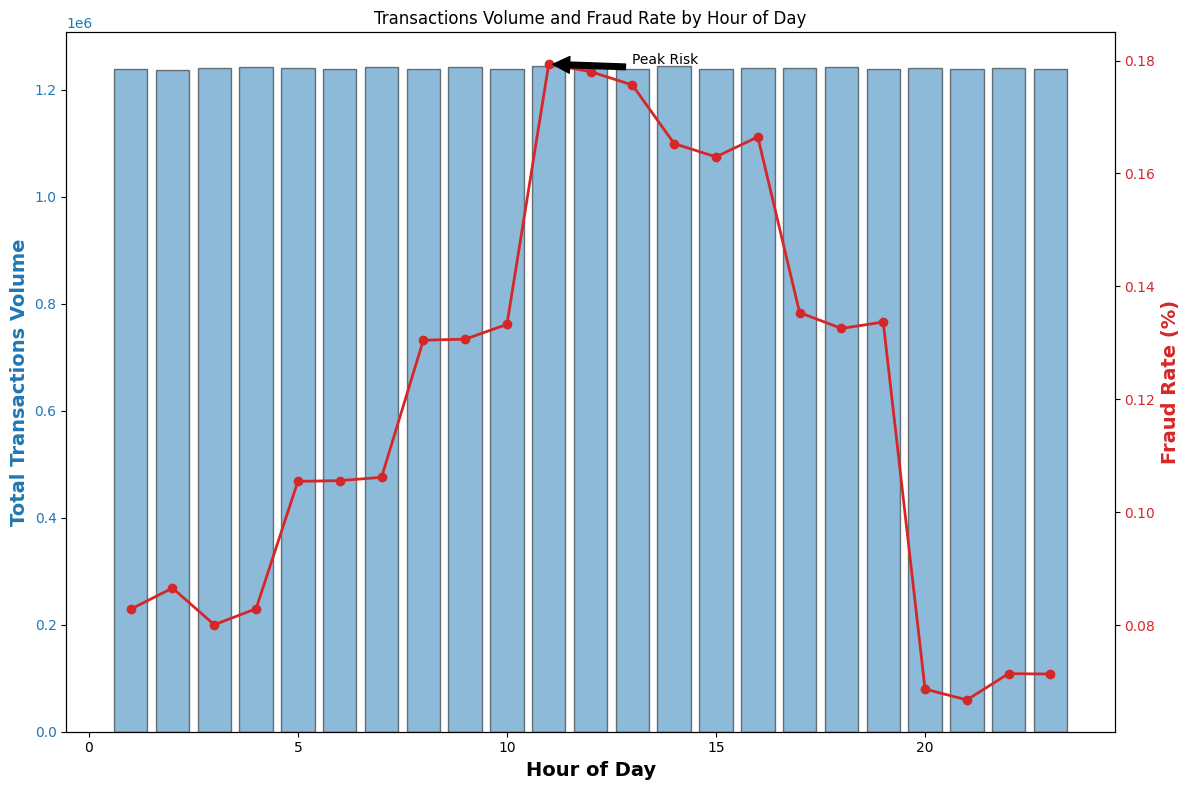

In [56]:
plot_data = f_hour.filter(pl.col('hour') != 0).sort('hour').collect().to_pandas()
fig, ax1 = plt.subplots(figsize=(12,8))

#plot 1 on total volume
color = 'tab:blue'
ax1.set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Transactions Volume', color=color, fontsize=14, fontweight='bold')
ax1.bar(plot_data['hour'], plot_data['total_txns'], color=color, alpha=0.5, label='Volume', edgecolor='black')
ax1.tick_params(axis='y', labelcolor=color)

#plot 2 on fraud rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Fraud Rate (%)', color=color, fontsize=14, fontweight='bold')
ax2.plot(plot_data['hour'], plot_data['fraud_rate_percent'], color=color, marker='o', label='Risk Rate', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

#plot 3 on risky hour highlight
max_risk_hour = plot_data.loc[plot_data['fraud_rate_percent'].idxmax()]
ax2.annotate('Peak Risk', xy=(max_risk_hour['hour'], max_risk_hour['fraud_rate_percent']),
             xytext=(max_risk_hour['hour']+2, max_risk_hour['fraud_rate_percent']),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Transactions Volume and Fraud Rate by Hour of Day')
plt.tight_layout()
plt.show()

In [57]:
#Amount Paid and Amount Received statistics by Laundering status
stats_paid = trans.group_by('Is Laundering').agg([
    pl.col('Amount Paid').count().alias('txn_count'),
    pl.col('Amount Paid').mean().alias('avg_amount_paid'),
    pl.col('Amount Paid').median().alias('median_amount_paid'),
    pl.col('Amount Paid').std().alias('std_amount_paid'),
    pl.col('Amount Paid').min().alias('min_amount_paid'),
    pl.col('Amount Paid').max().alias('max_amount_paid')
])

stats_received = trans.group_by('Is Laundering').agg([
    pl.col('Amount Received').count().alias('txn_count'),
    pl.col('Amount Received').mean().alias('avg_amount_received'),
    pl.col('Amount Received').median().alias('median_amount_received'),
    pl.col('Amount Received').std().alias('std_amount_received'),
    pl.col('Amount Received').min().alias('min_amount_received'),
    pl.col('Amount Received').max().alias('max_amount_received')
])

print("Calculating Statistical Distribution of Amount Paid vs Amount Received by Laundering Status...")
print("\n--- Amount Paid Statistics (Outflow) ---")
print(stats_paid.collect())

print("\n--- Amount Received Statistics (Inflow) ---")
print(stats_received.collect())

print('''
\n\nThe statistical summary reveals a distinct Structuring/Smurfing modus operandi within the laundering class.
Key observation: The central tendency of laundering transactions (Mean: ~$1,934) is significantly lower than legitimate traffic (Mean: ~$8,453).
This suggests the adversary is actively evading detection thresholds by breaking down illicit flows into smaller, less conspicuous increments.
Furthermore, the tighter standard deviation in the laundering class indicates a higher degree of automation or script adherence compared to the organic variance seen in legitimate customer behavior.

The key insight from the analysis is that laundering transactions in the dataset are significantly smaller than legitimate ones, which at first seems counter-intuitive.
While legitimate transactions have an average amount of around $8,453, laundering transactions average only about $1,934.
This indicates that criminals are not moving large sums in a single transaction but are instead splitting funds into many small transactions to avoid detection—a classic money laundering technique known as smurfing or structuring.
A closer look shows a strong long-tail effect in laundering behavior: the median laundering amount is only about $518, while the mean is much higher, suggesting that most transactions are very small, with occasional larger transfers mixed in to move real value.
Additionally, laundering transactions exhibit much lower variability than legitimate ones, implying highly consistent, scripted behavior, whereas legitimate users show messy and diverse spending patterns.
This distinction is critical for modeling, as it validates that transaction amount statistics—such as averages, variance, and frequency—are strong, meaningful signals that help machine learning models effectively separate suspicious behavior from normal activity)
''')

Calculating Statistical Distribution of Amount Paid vs Amount Received by Laundering Status...

--- Amount Paid Statistics (Outflow) ---
shape: (2, 7)
┌──────────────┬───────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┐
│ Is           ┆ txn_count ┆ avg_amount_p ┆ median_amoun ┆ std_amount_ ┆ min_amount_ ┆ max_amount_ │
│ Laundering   ┆ ---       ┆ aid          ┆ t_paid       ┆ paid        ┆ paid        ┆ paid        │
│ ---          ┆ u32       ┆ ---          ┆ ---          ┆ ---         ┆ ---         ┆ ---         │
│ i64          ┆           ┆ f64          ┆ f64          ┆ f64         ┆ f64         ┆ f64         │
╞══════════════╪═══════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 0            ┆ 31863008  ┆ 4.3637e6     ┆ 1467.36      ┆ 1.8419e9    ┆ 0.000001    ┆ 8.1586e12   │
│ 1            ┆ 35230     ┆ 5.3117e7     ┆ 8668.965     ┆ 4.9890e9    ┆ 0.000028    ┆ 9.0627e11   │
└──────────────┴───────────┴─────────────

In [58]:
#accounts receiving money from many different sources ( highly smurffing activity)
fan_in = trans.group_by('Account_duplicated_0').agg([
    pl.col('Account').n_unique().alias('unique_sender_count'),
    pl.col('Amount Received').sum().alias('total_received_amount'),
    pl.col('Is Laundering').max().alias('is_laundering_account')
])

#filter for high-risk mules:
#received from > 20 unique sources (suspicious aggregation behavior)
#receoved > $10000 (significant volume)

black_holes = fan_in.filter(
    (pl.col('unique_sender_count') > 20) & (pl.col('total_received_amount') > 10000)
).sort('unique_sender_count', descending=True)

print('Top 20 Black Hole Accounts (High-Risk Mules):')
print(black_holes.head(20).collect())

Top 20 Black Hole Accounts (High-Risk Mules):
shape: (20, 4)
┌──────────────────────┬─────────────────────┬───────────────────────┬───────────────────────┐
│ Account_duplicated_0 ┆ unique_sender_count ┆ total_received_amount ┆ is_laundering_account │
│ ---                  ┆ ---                 ┆ ---                   ┆ ---                   │
│ str                  ┆ u32                 ┆ f64                   ┆ i64                   │
╞══════════════════════╪═════════════════════╪═══════════════════════╪═══════════════════════╡
│ 100428660            ┆ 2304                ┆ 3.2873e6              ┆ 1                     │
│ 1004286A8            ┆ 1445                ┆ 1.6764e6              ┆ 1                     │
│ 1004286F0            ┆ 531                 ┆ 5.7982e6              ┆ 0                     │
│ 1004289C0            ┆ 291                 ┆ 2.9840e6              ┆ 0                     │
│ 100428858            ┆ 217                 ┆ 393579.78             ┆ 0            

In [59]:
#accounts sending money to hundreds of different destinations (highly distributuon or smurfing)
fan_out = trans.group_by('Account').agg([
    pl.col('Account_duplicated_0').n_unique().alias('unique_receiver_count'),
    pl.col('Amount Paid').sum().alias('total_paid_amount'),
    pl.col('Is Laundering').max().alias('is_laundering_account')
])

#filter for high-risk distributors:
#sent to > 50 unique destinations (suspicious distribution behavior)
#sent > $10000 (significant volume)

super_spreaders = fan_out.filter(
    (pl.col('unique_receiver_count') > 50) & (pl.col('total_paid_amount') > 10000)
).sort('unique_receiver_count', descending=True)

print('Top 20 Super Spreader Accounts (High-Risk Distributors):')
print(super_spreaders.head(20).collect())


Top 20 Super Spreader Accounts (High-Risk Distributors):


shape: (15, 4)
┌───────────┬───────────────────────┬───────────────────┬───────────────────────┐
│ Account   ┆ unique_receiver_count ┆ total_paid_amount ┆ is_laundering_account │
│ ---       ┆ ---                   ┆ ---               ┆ ---                   │
│ str       ┆ u32                   ┆ f64               ┆ i64                   │
╞═══════════╪═══════════════════════╪═══════════════════╪═══════════════════════╡
│ 100428660 ┆ 55956                 ┆ 3.1824e11         ┆ 1                     │
│ 1004286A8 ┆ 35128                 ┆ 1.5381e11         ┆ 1                     │
│ 1004286F0 ┆ 10882                 ┆ 4.2890e11         ┆ 1                     │
│ 1004289C0 ┆ 6840                  ┆ 1.1453e11         ┆ 1                     │
│ 100428858 ┆ 5256                  ┆ 3.6875e10         ┆ 1                     │
│ 100428810 ┆ 5018                  ┆ 2.0818e10         ┆ 1                     │
│ 1004287C8 ┆ 4769                  ┆ 1.6546e12         ┆ 1                     │
│

In [60]:
#currency distribution for each currncy how many laundering trasactions happened
#calculate both total volume and fraud count
curr_stats = trans.group_by('Payment Currency').agg([
    pl.count().alias('total_txn_count'),
    pl.col('Is Laundering').sum().alias('fraud_txn_count')
])

#calculate fraud rate
curr_stats = curr_stats.with_columns([
    (pl.col('fraud_txn_count') / pl.col('total_txn_count') * 100).alias('fraud_rate_percent')
]).filter(
    pl.col('total_txn_count') > 100
).sort('fraud_rate_percent', descending=True)

print('High-Risk Currencies by Fraud Rate:')
print(curr_stats.select([
    'Payment Currency',
    'total_txn_count',
    'fraud_txn_count',
    'fraud_rate_percent'
]).collect())


High-Risk Currencies by Fraud Rate:
shape: (15, 4)
┌───────────────────┬─────────────────┬─────────────────┬────────────────────┐
│ Payment Currency  ┆ total_txn_count ┆ fraud_txn_count ┆ fraud_rate_percent │
│ ---               ┆ ---             ┆ ---             ┆ ---                │
│ str               ┆ u32             ┆ i64             ┆ f64                │
╞═══════════════════╪═════════════════╪═════════════════╪════════════════════╡
│ UK Pound          ┆ 1018575         ┆ 1629            ┆ 0.159929           │
│ Ruble             ┆ 975525          ┆ 1457            ┆ 0.149355           │
│ Euro              ┆ 7315958         ┆ 9710            ┆ 0.132724           │
│ Yen               ┆ 856132          ┆ 1114            ┆ 0.13012            │
│ US Dollar         ┆ 11688249        ┆ 14292           ┆ 0.122277           │
│ Yuan              ┆ 2330638         ┆ 2775            ┆ 0.119066           │
│ Rupee             ┆ 738718          ┆ 830             ┆ 0.112357           │
│

In [61]:
#Payment Format
format_stats = trans.group_by('Payment Format').agg([
    pl.count().alias('total_txn_count'),
    pl.col('Is Laundering').sum().alias('fraud_txn_count')
])

format_stats = format_stats.with_columns([
    (pl.col('fraud_txn_count') / pl.col('total_txn_count')).alias('fraud_rate')
])

format_final = format_stats.filter(
    pl.col('total_txn_count') > 50
).sort('fraud_rate', descending=True)

format_final = format_final.with_columns([
    (pl.col('fraud_rate') * 100).alias('fraud_rate_pct')
])

print('High-Risk Payments Formats: ')
print(format_final.select([
    'Payment Format',
    'total_txn_count',
    'fraud_txn_count',
    'fraud_rate_pct'
]).collect())

High-Risk Payments Formats: 
shape: (7, 4)
┌────────────────┬─────────────────┬─────────────────┬────────────────┐
│ Payment Format ┆ total_txn_count ┆ fraud_txn_count ┆ fraud_rate_pct │
│ ---            ┆ ---             ┆ ---             ┆ ---            │
│ str            ┆ u32             ┆ i64             ┆ f64            │
╞════════════════╪═════════════════╪═════════════════╪════════════════╡
│ ACH            ┆ 3868410         ┆ 30746           ┆ 0.794797       │
│ Bitcoin        ┆ 689038          ┆ 244             ┆ 0.035412       │
│ Cash           ┆ 3217531         ┆ 666             ┆ 0.020699       │
│ Cheque         ┆ 12280058        ┆ 2220            ┆ 0.018078       │
│ Credit Card    ┆ 8777816         ┆ 1354            ┆ 0.015425       │
│ Reinvestment   ┆ 1945611         ┆ 0               ┆ 0.0            │
│ Wire           ┆ 1119774         ┆ 0               ┆ 0.0            │
└────────────────┴─────────────────┴─────────────────┴────────────────┘


In [62]:
#payment format entropy analysis
'''
Legitimate users usually stick to one channel (e.g., Salary = ACH, Coffee = Credit Card).
Criminals exploit multiple channels to avoid channel-specific limits.
'''

format_entropy = trans.group_by('Account').agg([
    pl.col('Payment Format').n_unique().alias('unique_formats_used'),
    pl.col('Is Laundering').max().alias('is_fraud')
]).sort('unique_formats_used', descending=True)

print('Accounts with using Multiple Payment Formats: ')
print(format_entropy.filter(pl.col('unique_formats_used') >= 5).head(20).collect())

Accounts with using Multiple Payment Formats: 
shape: (20, 3)
┌───────────┬─────────────────────┬──────────┐
│ Account   ┆ unique_formats_used ┆ is_fraud │
│ ---       ┆ ---                 ┆ ---      │
│ str       ┆ u32                 ┆ i64      │
╞═══════════╪═════════════════════╪══════════╡
│ 80FBF25C0 ┆ 6                   ┆ 0        │
│ 8232E51F0 ┆ 6                   ┆ 0        │
│ 81190F670 ┆ 6                   ┆ 0        │
│ 84A54A480 ┆ 6                   ┆ 0        │
│ 802C81880 ┆ 6                   ┆ 0        │
│ 807A30370 ┆ 6                   ┆ 0        │
│ 8009889C0 ┆ 6                   ┆ 0        │
│ 8001759C0 ┆ 6                   ┆ 0        │
│ 800F241D0 ┆ 6                   ┆ 0        │
│ 80E1B56F0 ┆ 6                   ┆ 0        │
│ 810BADB20 ┆ 6                   ┆ 0        │
│ 813D70580 ┆ 6                   ┆ 0        │
│ 8286DF9D0 ┆ 6                   ┆ 0        │
│ 83692C2E0 ┆ 6                   ┆ 0        │
│ 82D7317B0 ┆ 6                   ┆ 0        

In [63]:
#Bank Flow ANALYSIS
'''
The Bank Flow Analysis reveals 'Toxic Corridors'—specific pairs of financial institutions that act as conduits for illicit funds.
By quantifying the 'Laundered Volume' per route, we move beyond simple traffic metrics to identify systemic vulnerabilities in the correspondent banking network.
This allows for targeted intervention: freezing specific payment rails rather than penalizing entire institutions
'''

bank_flow = trans.group_by(['From Bank', 'To Bank']).agg([
    pl.count().alias('total_txn_count'),
    pl.col('Amount Paid').sum().alias('total_volume'),
    pl.col('Is Laundering').sum().alias('fraud_txn_count'),
    pl.col('Amount Paid').filter(pl.col('Is Laundering') == 1).sum().alias('laundered_volume')
])

#calaculta risk ratios
bank_flow = bank_flow.with_columns([
    (pl.col('fraud_txn_count') / pl.col('total_txn_count')).alias('txn_fraud_rate'),
    (pl.col('laundered_volume') / pl.col('total_volume')).alias('volume_fraud_rate')
])

bank_flow = bank_flow.filter(pl.col('total_volume') > 0)
bank_flow = bank_flow.sort('laundered_volume', descending=True)

print('High-RISk Banking Corridors: ')
print(bank_flow.head(20).collect())

High-RISk Banking Corridors: 
shape: (20, 8)
┌───────────┬─────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┐
│ From Bank ┆ To Bank ┆ total_txn_ ┆ total_volu ┆ fraud_txn_ ┆ laundered_ ┆ txn_fraud_ ┆ volume_fr │
│ ---       ┆ ---     ┆ count      ┆ me         ┆ count      ┆ volume     ┆ rate       ┆ aud_rate  │
│ i64       ┆ i64     ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│           ┆         ┆ u32        ┆ f64        ┆ i64        ┆ f64        ┆ f64        ┆ f64       │
╞═══════════╪═════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ 159430    ┆ 52481   ┆ 1          ┆ 9.0627e11  ┆ 1          ┆ 9.0627e11  ┆ 1.0        ┆ 1.0       │
│ 129449    ┆ 151989  ┆ 1          ┆ 1.5752e11  ┆ 1          ┆ 1.5752e11  ┆ 1.0        ┆ 1.0       │
│ 171692    ┆ 240298  ┆ 1          ┆ 1.1010e11  ┆ 1          ┆ 1.1010e11  ┆ 1.0        ┆ 1.0       │
│ 112719    ┆ 262657  ┆ 1          ┆ 6.2123e10

In [64]:
bank_flow_1 = bank_flow.filter(pl.col('fraud_txn_count') > 0)
bank_flow_1 = bank_flow_1.sort('txn_fraud_rate', descending=True)
print('High-Risk Corridors by Fraud Rate:')
print(bank_flow_1.head(20).collect())

print('''
Analysis of twenty banking corridors reveals a sophisticated money laundering network with 100% fraud saturation and $300,000+ exposure, anchored by a hub-and-spoke architecture centered on Bank 143079.
The pattern—combining high-value single transactions, minimal test transfers, and amounts clustered just below CTR thresholds—exemplifies shell bank exploitation and systematic structuring.
While the data exposes calculated operational security through volume dispersion and circular flows, critical gaps remain: absent temporal data prevents velocity analysis, anonymized bank IDs obscure jurisdictional risks,
and unclear ground truth (investigation vs. model-prediction) demands validation before action.
Immediate enhanced due diligence on high-frequency institutions, SAR filings citing "complete corridor compromise," and graph network mapping are essential; failure to investigate risks regulatory sanction and continued systemic abuse.
Risk Rating: HIGH—investigation and corridor blocking warranted pending confirmation.
''')

High-Risk Corridors by Fraud Rate:


shape: (20, 8)
┌───────────┬─────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┐
│ From Bank ┆ To Bank ┆ total_txn_ ┆ total_volu ┆ fraud_txn_ ┆ laundered_ ┆ txn_fraud_ ┆ volume_fr │
│ ---       ┆ ---     ┆ count      ┆ me         ┆ count      ┆ volume     ┆ rate       ┆ aud_rate  │
│ i64       ┆ i64     ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│           ┆         ┆ u32        ┆ f64        ┆ i64        ┆ f64        ┆ f64        ┆ f64       │
╞═══════════╪═════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ 250982    ┆ 175709  ┆ 1          ┆ 3529.81    ┆ 1          ┆ 3529.81    ┆ 1.0        ┆ 1.0       │
│ 151469    ┆ 13293   ┆ 1          ┆ 16236.47   ┆ 1          ┆ 16236.47   ┆ 1.0        ┆ 1.0       │
│ 40531     ┆ 37048   ┆ 1          ┆ 16768.66   ┆ 1          ┆ 16768.66   ┆ 1.0        ┆ 1.0       │
│ 214       ┆ 6       ┆ 1          ┆ 701791.2   ┆ 1          ┆ 701791.2   ┆ 

In [65]:
#legitimate users dont make 100 transactions in an hour. Bots do. This is the Burstiness analysis.
#calculate Transactions Per Day (TPD) and Peak Hourly Velocity
acc_velocity = trans.group_by('Account').agg([
    pl.col('Timestamp').dt.date().n_unique().alias('active_days'),
    pl.count().alias('total_txns'),
    (pl.count() / pl.col('Timestamp').dt.date().n_unique()).alias('avg_txns_per_day')
])

turbo_acc = acc_velocity.filter(
    (pl.col('avg_txns_per_day') > 50)
).sort('avg_txns_per_day', descending=True)

print('Turbo Accounts High Velocity')
print(turbo_acc.head(20).collect())

Turbo Accounts High Velocity
shape: (15, 4)
┌───────────┬─────────────┬────────────┬──────────────────┐
│ Account   ┆ active_days ┆ total_txns ┆ avg_txns_per_day │
│ ---       ┆ ---         ┆ ---        ┆ ---              │
│ str       ┆ u32         ┆ u32        ┆ f64              │
╞═══════════╪═════════════╪════════════╪══════════════════╡
│ 100428660 ┆ 16          ┆ 1076979    ┆ 67311.1875       │
│ 1004286A8 ┆ 16          ┆ 678929     ┆ 42433.0625       │
│ 1004286F0 ┆ 16          ┆ 208695     ┆ 13043.4375       │
│ 1004289C0 ┆ 16          ┆ 132783     ┆ 8298.9375        │
│ 100428858 ┆ 16          ┆ 102358     ┆ 6397.375         │
│ 100428810 ┆ 16          ┆ 96007      ┆ 6000.4375        │
│ 1004287C8 ┆ 16          ┆ 90963      ┆ 5685.1875        │
│ 1004288A0 ┆ 16          ┆ 87870      ┆ 5491.875         │
│ 100428738 ┆ 16          ┆ 80578      ┆ 5036.125         │
│ 100428978 ┆ 16          ┆ 79501      ┆ 4968.8125        │
│ 1004288E8 ┆ 16          ┆ 76693      ┆ 4793.3125      

In [66]:
round_num = trans.group_by('Account').agg([
    (pl.col('Amount Paid').floordiv(1) == pl.col('Amount Paid')).sum().alias('round_txns_count'),
    pl.count().alias('total_txns')
]).with_columns(
    (pl.col('round_txns_count') / pl.col('total_txns')).alias('round_txns_ratio')
)

round_analysis = round_num.filter(
    (pl.col('total_txns') > 50) & (pl.col('round_txns_ratio') > 0.8)
).sort('round_txns_ratio', descending=True)

print('Round Number Suspects')
print(round_analysis.collect())

Round Number Suspects
shape: (0, 4)
┌─────────┬──────────────────┬────────────┬──────────────────┐
│ Account ┆ round_txns_count ┆ total_txns ┆ round_txns_ratio │
│ ---     ┆ ---              ┆ ---        ┆ ---              │
│ str     ┆ u32              ┆ u32        ┆ f64              │
╞═════════╪══════════════════╪════════════╪══════════════════╡
└─────────┴──────────────────┴────────────┴──────────────────┘


In [67]:
#EDA: Accounts data
#entiy statistic
#find entities that own an unusually high number of accounts.
#risk: a legitimate person usually has 1-3 accounts. An entity with 50+ accounts is likely a Shell Network or a Money Service Business (MSB) acting without a license.

#identify entities with suspiciously high account density
whale_entities = details.group_by('Entity ID').agg([
    pl.col('Account Number').count().alias('account_count'),
    pl.col('Bank ID').n_unique().alias('unique_banks'),
    pl.col('Bank Name').alias('involved_banks'),
]).filter(
    (pl.col('account_count') > 50)
).sort('account_count', descending=True)

print('Synthetic Whale Entities: ')
print(whale_entities.head(20).collect())

Synthetic Whale Entities: 
shape: (20, 4)
┌─────────────┬───────────────┬──────────────┬─────────────────────────────────┐
│ Entity ID   ┆ account_count ┆ unique_banks ┆ involved_banks                  │
│ ---         ┆ ---           ┆ ---          ┆ ---                             │
│ str         ┆ u32           ┆ u32          ┆ list[str]                       │
╞═════════════╪═══════════════╪══════════════╪═════════════════════════════════╡
│ 2AA1D8AEFB0 ┆ 8638          ┆ 813          ┆ ["Crytpo Bank #20", "Crytpo Ba… │
│ 2AA203253D0 ┆ 5639          ┆ 2078         ┆ ["Israel Bank #458", "Israel B… │
│ 2AA208AC7D0 ┆ 4738          ┆ 886          ┆ ["Brazil Bank #49", "Crytpo Ba… │
│ 2AA1FE77330 ┆ 4714          ┆ 1335         ┆ ["Mexico Bank #38", "Mexico Ba… │
│ 2AA1E405CB0 ┆ 4369          ┆ 1125         ┆ ["Crytpo Bank #443", "Crytpo B… │
│ 2AA2017EDA0 ┆ 4237          ┆ 1131         ┆ ["Switzerland Bank #101", "Swi… │
│ 2AA205E39A0 ┆ 4078          ┆ 1134         ┆ ["Saudi Arabia Bank 

In [68]:
#identify entities spreading themselves across too many banks
bank_hoppers = details.group_by('Entity ID').agg([
    pl.col('Account Number').count().alias('account_count'),
    pl.col('Bank ID').n_unique().alias('unique_banks'),
    (pl.col('Bank ID').n_unique() / pl.col('Account Number').count()).alias('dispertion_ratio')
]).filter(
    (pl.col('unique_banks') > 3 ) & (pl.col('account_count') > 3)
).sort('dispertion_ratio', descending=True)

print('Bank Hoppers: ')
print(bank_hoppers.head(20).collect())

Bank Hoppers: 


shape: (20, 4)
┌─────────────┬───────────────┬──────────────┬──────────────────┐
│ Entity ID   ┆ account_count ┆ unique_banks ┆ dispertion_ratio │
│ ---         ┆ ---           ┆ ---          ┆ ---              │
│ str         ┆ u32           ┆ u32          ┆ f64              │
╞═════════════╪═══════════════╪══════════════╪══════════════════╡
│ 2AA1EB69B70 ┆ 7             ┆ 7            ┆ 1.0              │
│ 2AA201F3030 ┆ 23            ┆ 23           ┆ 1.0              │
│ 2AA1F2D9E20 ┆ 10            ┆ 10           ┆ 1.0              │
│ 2AA1EF8B400 ┆ 4             ┆ 4            ┆ 1.0              │
│ 2AA1F94F2E0 ┆ 4             ┆ 4            ┆ 1.0              │
│ 2AA1E6CAD30 ┆ 4             ┆ 4            ┆ 1.0              │
│ 2AA1EB8A0F0 ┆ 8             ┆ 8            ┆ 1.0              │
│ 2AA20754D20 ┆ 19            ┆ 19           ┆ 1.0              │
│ 2AA1EC6F250 ┆ 14            ┆ 14           ┆ 1.0              │
│ 2AA208271A0 ┆ 18            ┆ 18           ┆ 1.0           

In [69]:
#A small bank with 100 accounts might be riskier than a giant bank with 100,000 accounts if 50% of that small bank's customers are fraudsters.
fraud_acc = trans.group_by('Account').agg([
    pl.col('Is Laundering').max().alias('is_dirty')
])

enrich_acc = details.join(fraud_acc, left_on='Account Number', right_on='Account', how='left').fill_null(0)
#calculate risk per bank
bank_risk = enrich_acc.group_by('Bank Name').agg([
    pl.col('Account Number').count().alias('total_counts'),
    pl.col('Entity ID').n_unique().alias('total_entities'),
    pl.col('is_dirty').sum().alias('dirty_accounts'),
    (pl.col('is_dirty').sum() / pl.col('Account Number').count()).alias('bank_toxicity_rate')
]).filter(
    (pl.col('total_counts') > 100)
).sort('bank_toxicity_rate', descending=True)

print('Toxic Banks:  ')
print(bank_risk.head(20).collect())

Toxic Banks:  
shape: (20, 5)
┌────────────────────────┬──────────────┬────────────────┬────────────────┬────────────────────┐
│ Bank Name              ┆ total_counts ┆ total_entities ┆ dirty_accounts ┆ bank_toxicity_rate │
│ ---                    ┆ ---          ┆ ---            ┆ ---            ┆ ---                │
│ str                    ┆ u32          ┆ u32            ┆ i64            ┆ f64                │
╞════════════════════════╪══════════════╪════════════════╪════════════════╪════════════════════╡
│ France Bank #59        ┆ 1188         ┆ 1125           ┆ 93             ┆ 0.078283           │
│ Portugal Bank #19      ┆ 1189         ┆ 1130           ┆ 91             ┆ 0.076535           │
│ Italy Bank #270        ┆ 1138         ┆ 1085           ┆ 80             ┆ 0.070299           │
│ Hearthstone Bancorp    ┆ 3423         ┆ 3343           ┆ 196            ┆ 0.05726            │
│ Germany Bank #146      ┆ 910          ┆ 891            ┆ 52             ┆ 0.057143           │


In [70]:
#get the fraud status from Transactions (Did this Entity commit fraud?)
#we map Account -> Entity to see which entities are dirty
risk_from_txn = trans.group_by('Account').agg([
    pl.col('Is Laundering').max().alias('account_is_dirty')
])

acc_with_risk = details.join(
    risk_from_txn,
    left_on='Account Number',
    right_on='Account',
    how='left'
).fill_null(pl.lit(0))

final_entity_risk = acc_with_risk.group_by('Entity ID').agg([
    pl.col('Account Number').count().alias('total_accounts'),
    pl.col('Entity ID').n_unique().alias('total_banks'),
    (pl.col('account_is_dirty').sum()> 0).alias('is_disry_entity'),
    pl.col('account_is_dirty').sum().alias('num_dirty_accounts')
]).filter(
    (pl.col('is_disry_entity') == True)
).sort('num_dirty_accounts',descending=True)

print('High risk entity profiles: ')
print(final_entity_risk.head(20).collect())

High risk entity profiles: 
shape: (20, 5)
┌─────────────┬────────────────┬─────────────┬─────────────────┬────────────────────┐
│ Entity ID   ┆ total_accounts ┆ total_banks ┆ is_disry_entity ┆ num_dirty_accounts │
│ ---         ┆ ---            ┆ ---         ┆ ---             ┆ ---                │
│ str         ┆ u32            ┆ u32         ┆ bool            ┆ i64                │
╞═════════════╪════════════════╪═════════════╪═════════════════╪════════════════════╡
│ 2AA1D8AEFB0 ┆ 8638           ┆ 1           ┆ true            ┆ 40                 │
│ 2AA1D8C69D0 ┆ 3290           ┆ 1           ┆ true            ┆ 24                 │
│ 2AA208AC7D0 ┆ 4738           ┆ 1           ┆ true            ┆ 17                 │
│ 2AA1D7EC6B0 ┆ 2566           ┆ 1           ┆ true            ┆ 12                 │
│ 2AA1E405CB0 ┆ 4369           ┆ 1           ┆ true            ┆ 12                 │
│ 2AA1F65CAD0 ┆ 1225           ┆ 1           ┆ true            ┆ 11                 │
│ 2AA1F6AB5

In [71]:
#key account linkage checj
sender_account = trans.select('Account').unique()
sender_coverage = sender_account.join(
    details.select('Account Number').unique().with_columns(pl.lit(1).alias('present')),
    left_on='Account',
    right_on='Account Number',
    how='left'
)
missing_senders = sender_coverage.filter(pl.col('present').is_null()).collect().shape[0]

print(f"    Senders account not in dataset: {missing_senders}")

receiver_account = trans.select('Account_duplicated_0').unique()
receiver_coverage = receiver_account.join(
    details.select('Account Number').unique().with_columns(pl.lit(1).alias('present')),
    left_on='Account_duplicated_0',
    right_on='Account Number',
    how='left'
)
missing_receivers = receiver_coverage.filter(pl.col('present').is_null()).collect().shape[0]

print(f"    Receivers account not in dataset: {missing_receivers}")

    Senders account not in dataset: 0
    Receivers account not in dataset: 0


In [72]:
from pathlib import Path

def add_cyclical_time_features(df: pl.LazyFrame) -> pl.LazyFrame:
    """
    Add cyclical encodings for temporal features.
    # OPTIMIZED: Now works with LazyFrame instead of DataFrame
    """
    return df.with_columns([
        (2 * np.pi * pl.col('Timestamp').dt.hour() / 24).sin().alias('hour_sin'),
        (2 * np.pi * pl.col('Timestamp').dt.hour() / 24).cos().alias('hour_cos'),
        (2 * np.pi * pl.col('Timestamp').dt.weekday() / 7).sin().alias('day_of_week_sin'),
        (2 * np.pi * pl.col('Timestamp').dt.weekday() / 7).cos().alias('day_of_week_cos'),
        (2 * np.pi * pl.col('Timestamp').dt.day() / 31).sin().alias('day_of_month_sin'),
        (2 * np.pi * pl.col('Timestamp').dt.day() / 31).cos().alias('day_of_month_cos'),
    ])

In [ ]:
def add_benford_features(df: pl.LazyFrame) -> pl.LazyFrame:
    """
    Compute Benford's Law deviation and round number analysis.
    """
    return df.with_columns([
        #extract first digit of amount
        pl.col('Amount Paid')
            .cast(pl.Utf8)
            .str.replace_all(r'[^1-9].*', '')
            .str.slice(0, 1)
            .cast(pl.Int32, strict=False)
            .alias('first_digit'),

        #check if amount is round number (divisible by 100)
        (pl.col('Amount Paid') % 100 == 0).cast(pl.Int8).alias('is_round_100'),

        #check if amount is very round (divisible by 1000)
        (pl.col('Amount Paid') % 1000 == 0).cast(pl.Int8).alias('is_round_1000'),
    ])


In [74]:
def compute_rolling_features_batch1(df: pl.LazyFrame) -> pl.LazyFrame:
    """
    Batch 1: Transaction counts only
    """
    return df.with_columns([
        pl.col('Timestamp')
            .rolling_count_by(period='1h', by='Timestamp')
            .over('Account')
            .shift(1)
            .fill_null(0)
            .alias('txn_count_1h'),

        pl.col('Timestamp')
            .rolling_count_by(period='24h', by='Timestamp')
            .over('Account')
            .shift(1)
            .fill_null(0)
            .alias('txn_count_24h'),

        pl.col('Timestamp')
            .rolling_count_by(period='7d', by='Timestamp')
            .over('Account')
            .shift(1)
            .fill_null(0)
            .alias('txn_count_7d'),

        pl.col('Timestamp')
            .rolling_count_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .fill_null(0)
            .alias('txn_count_28d'),
    ])


def compute_rolling_features_batch2(df: pl.LazyFrame) -> pl.LazyFrame:
    """
    Batch 2: Volume statistics
    """
    return df.with_columns([
        pl.col('Amount Paid')
            .rolling_sum_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .fill_null(0)
            .alias('total_amount_paid_28d'),

        pl.col('Amount Received')
            .rolling_sum_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .fill_null(0)
            .alias('total_amount_received_28d'),
    ])


def compute_rolling_features_batch3(df: pl.LazyFrame) -> pl.LazyFrame:
    """
    Batch 3: Statistical aggregations
    """
    return df.with_columns([
        pl.col('Amount Paid')
            .rolling_mean_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .alias('mean_amount_paid_28d'),

        pl.col('Amount Paid')
            .rolling_std_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .alias('std_amount_paid_28d'),

        pl.col('Amount Paid')
            .rolling_median_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .alias('median_amount_paid_28d'),

        pl.col('Amount Paid')
            .rolling_max_by(period='28d', by='Timestamp')
            .over('Account')
            .shift(1)
            .alias('max_amount_paid_28d'),
    ])


In [ ]:
import hashlib
def hash_pii_column(df: pl.LazyFrame, col_name: str) -> pl.LazyFrame:
    """
    Hashes a PII column to comply with Data Minization principles.
    Uses a deterministic salt key stored securely or in config.
    """
    # In production, 'PII_SALT' should be an environment variable or secrets manager
    salt = os.getenv("PII_SALT", "DEFAULT_SALT_INSECURE_REPLACE_ME")
    
    return df.with_columns([
        pl.col(col_name).map_elements(
            lambda x: hashlib.sha256((str(x) + salt).encode()).hexdigest(),
            return_dtype=pl.Utf8
        ).alias(f"{col_name}_HASHED")
    ])


print('''
I introduced PII hashing to protect sensitive customer data while keeping it useful for modeling. 
AML data contains private details like account numbers and entity names, and storing them in plain text is risky and non-compliant. 
Hashing works like replacing a real name with a locker number—the model can still recognize the same locker every time, but no one can see who it belongs to. 
Using a one-way hash (SHA-256) makes the data irreversible and anonymous, yet still allows grouping, aggregations, and pattern detection. 
This keeps the feature store secure, compliant, and for real banking environments
''')

In [79]:
def add_account_lifecycle_features(df: pl.LazyFrame) -> pl.LazyFrame:
    """
    Add features tracking account age, tenure, and activity patterns.
    """


    # OPTIMIZED: Use window function instead of separate group_by + join
    df = df.with_columns([
        pl.col('Timestamp').min().over('Account').alias('account_first_txn')
    ])

    df = df.with_columns([
        # Days since account's first transaction
        ((pl.col('Timestamp') - pl.col('account_first_txn'))
         .dt.total_seconds() / 86400)
        .alias('account_tenure_days'),

        # Transaction sequence number for this account
        pl.col('Timestamp')
            .rank(method='ordinal')
            .over('Account')
            .alias('txn_rank_in_account_history'),

        # Days since previous transaction
        ((pl.col('Timestamp') - pl.col('Timestamp').shift(1).over('Account'))
         .dt.total_seconds() / 86400)
        .fill_null(0)
        .alias('days_since_last_txn'),

        # Flags for account maturity
        (pl.col('Timestamp') - pl.col('account_first_txn') >= pl.duration(days=7))
        .cast(pl.Int8)
        .alias('has_7d_history'),

        (pl.col('Timestamp') - pl.col('account_first_txn') >= pl.duration(days=28))
        .cast(pl.Int8)
        .alias('has_28d_history'),
    ])

    return df

In [80]:
def compute_derived_features(df: pl.LazyFrame) -> pl.LazyFrame:
    """Compute derived features from rolling statistics."""
    return df.with_columns([
        # Transaction velocity
        (pl.col('txn_count_24h') / (pl.col('txn_count_7d') + 1))
            .alias('txn_velocity_ratio'),
        
        # Amount deviation from average
        ((pl.col('Amount Paid') - pl.col('mean_amount_paid_28d')) / 
         (pl.col('mean_amount_paid_28d') + 1)).alias('amount_deviation_from_avg'),
        
        # Size ratio to maximum
        (pl.col('Amount Paid') / (pl.col('max_amount_paid_28d') + 1))
            .alias('amount_vs_max_ratio'),
        
        # Volume concentration
        (pl.col('total_amount_paid_28d') / (pl.col('txn_count_28d') + 1))
            .alias('avg_txn_size_28d'),
    ])



In [ ]:
def apply_toxic_corridor_features(df: pl.LazyFrame, toxic_corridors: pl.DataFrame) -> pl.LazyFrame:
  """
  Add features measuring exposure to toxic corridors.
  """
  # Join with toxic corridor list
  df = df.join(
      toxic_corridors.lazy(),
      on=['From Bank', 'To Bank'],
      how='left'
  ).with_columns([
      pl.col('is_toxic_corridor').fill_null(0),
      pl.col('fraud_rate').fill_null(0).alias('corridor_risk_score'),
  ])

  df = df.with_columns([
      pl.col('is_toxic_corridor')
          .rolling_sum_by(window_size='28d', by='Timestamp')
          .over('Account')
          .shift(1)
          .fill_null(0)
          .alias('toxic_corridor_count_28d'),

      (pl.col('Amount Paid') * pl.col('is_toxic_corridor'))
          .rolling_sum_by(window_size='28d', by='Timestamp')
          .over('Account')
          .shift(1)
          .fill_null(0)
          .alias('toxic_corridor_volume_28d'),
  ])

  df = df.with_columns([
      (pl.col('toxic_corridor_volume_28d') /
        pl.when(pl.col('total_amount_paid_28d') > 0)
          .then(pl.col('total_amount_paid_28d'))
          .otherwise(1.0))
      .alias('pct_volume_via_toxic_corridors'),
  ])

  return df


In [ ]:
from datetime import timedelta
class AMLFeatureEngineer:
  def __init__(self,
                transactions_path: str,
                accounts_path: str,
                output_dir: str = './features'):
      self.transactions_path = transactions_path
      self.accounts_path = accounts_path
      self.output_dir = Path(output_dir)
      self.output_dir.mkdir(exist_ok=True)
      self.toxic_corridors = None

  def load_data(self) -> tuple[pl.LazyFrame, pl.DataFrame]:
      """
      Load and validate raw data.
      """
      print("📥 Loading data...")

      #Keep transactions lazy for memory efficiency
      trans = pl.scan_csv(
          self.transactions_path,
          try_parse_dates=True,
          low_memory=True
      )

      #accounts is small, can be eager
      accounts = pl.scan_csv(self.accounts_path).collect()

      #get count without collecting entire dataset
      trans_count = trans.select(pl.count()).collect()[0, 0]

      print(f" ✓ Loaded {trans_count:,} transactions (lazy)")
      print(f" ✓ Loaded {len(accounts):,} accounts")

      return trans, accounts

  def create_temporal_split(self, df: pl.LazyFrame) -> pl.LazyFrame:
      """
      Create train/val/test split based on time.
      # OPTIMIZED: Works with LazyFrame, defers execution
      """
      print("📊 Creating temporal splits...")

      #get max timestamp
      max_timestamp = df.select(pl.col('Timestamp').max()).collect()[0, 0]

      test_start = max_timestamp - timedelta(days=7)
      val_start = test_start - timedelta(days=7)

      df = df.with_columns([
          pl.when(pl.col('Timestamp') < val_start)
            .then(pl.lit('train'))
            .when(pl.col('Timestamp') < test_start)
            .then(pl.lit('val'))
            .otherwise(pl.lit('test'))
            .alias('split')
      ])


      split_counts = df.group_by('split').agg(pl.count().alias('count')).collect()

      for row in split_counts.iter_rows(named=True):
          print(f" ✓ {row['split'].capitalize()}: {row['count']:,}")

      return df

  def split_and_save_raw(self, df: pl.LazyFrame):
      '''
      split and save raw data
      this allows processiing each split independently
      '''
      print('Splitting and saving raw data....')

      for split_name in ['train', 'val', 'test']:
        print(f" Saving raw {split_name} split....")
        output_path = self.output_dir / f"{split_name}_raw.parquet"
        (
            df.filter(pl.col('split') == split_name)
            .sink_parquet(output_path)
        )

        print(f"  Saved {split_name}_raw.parquet")


  def process_split(self, split_name: str, accounts: pl.DataFrame, toxic_corridors: pl.DataFrame = None):
      """
      Process a single split with all features.
      OPTIMIZED: Single sort strategy for memory efficiency.
      """
      logger.info(f"{'='*60}")
      logger.info(f"Processing {split_name.upper()} split...")
      logger.info(f"{'='*60}")

      # 1. Load Split
      input_path = self.output_dir / f'{split_name}_raw.parquet'
      df = pl.scan_parquet(input_path)

      logger.info("  Phase 0: Hashing PII (acoount IDs..)")
      df = hash_pii_column(df, 'Account')

      # 2. Basic Features (Map operations, low memory)
      logger.info("  Phase 1: Basic time & benford features...")
      df = add_cyclical_time_features(df)
      df = add_benford_features(df)

      # 3. Entity Join (Must happen before sort)
      logger.info("  Phase 2: Entity enrichment...")
      df = self._add_entity_features(df, accounts)

      # 4. ACCOUNT LIFECYCLE (Requires Sorted Data)
      # We sort here ONCE. This sort persists through the lazy frame evaluation.
      logger.info("  Phase 3: Sorting by Account & Timestamp for rolling windows...")
      df = df.sort(['Account_HASHED', 'Timestamp'])

      logger.info("  Phase 3b: Calculating Lifecycle features...")
      df = add_account_lifecycle_features(df)

      # CHECKPOINT 1
      temp_path = self.output_dir / f'{split_name}_checkpoint1.parquet'
      logger.info(f"  Saving Checkpoint 1 -> {temp_path.name}")
      df.sink_parquet(temp_path)
      df = pl.scan_parquet(temp_path)

      # 5. ROLLING BATCH 1 (Counts)
      logger.info("  Phase 4a: Rolling counts...")
      df = compute_rolling_features_batch1(df)

      # CHECKPOINT 2
      temp_path = self.output_dir / f'{split_name}_checkpoint2.parquet'
      logger.info(f"  Saving Checkpoint 2 -> {temp_path.name}")
      df.sink_parquet(temp_path)
      df = pl.scan_parquet(temp_path)

      # 6. ROLLING BATCH 2 (Volumes)
      logger.info("  Phase 4b: Rolling volumes...")
      df = compute_rolling_features_batch2(df)

      # CHECKPOINT 3
      temp_path = self.output_dir / f'{split_name}_checkpoint3.parquet'
      logger.info(f"  Saving Checkpoint 3 -> {temp_path.name}")
      df.sink_parquet(temp_path)

      # If this is the training split, we compute toxic corridors now
      # using this checkpoint, as requested by the user logic.
      if split_name == 'train' and self.toxic_corridors is None:
          logger.info("  -> Computing toxic corridors from Checkpoint 3...")
          self.compute_toxic_corridors(temp_path)

      # Reload for next phase
      df = pl.scan_parquet(temp_path)

      # 7. ROLLING BATCH 3 (Statistics) - MOST HEAVY
      logger.info("  Phase 4c: Rolling statistics (Mean, Std, Median)...")
      try:
          df = compute_rolling_features_batch3(df)
      except Exception as e:
          logger.error(f"CRITICAL: Failed during rolling stats (likely OOM): {e}")
          raise

      # 8. DERIVED FEATURES
      logger.info("  Phase 5: Derived features...")
      df = compute_derived_features(df)

      # 9. TOXIC CORRIDORS
      if toxic_corridors is not None:
          logger.info("  Phase 6: Toxic corridor features...")
          df = apply_toxic_corridor_features(df, toxic_corridors)

      # FINAL OUTPUT
      output_path = self.output_dir / f'{split_name}_features.parquet'
      logger.info(f"  Saving Final Output -> {output_path.name}")
      df.sink_parquet(output_path)

      # CLEANUP CHECKPOINTS
      self._cleanup_checkpoints(split_name)

      logger.info(f"  ✅ {split_name.upper()} complete!")


  def _add_entity_features(self, df: pl.LazyFrame, accounts: pl.DataFrame) -> pl.LazyFrame:
      """
      Join with accounts and add entity-level features.
      """

      entity_stats = (
          accounts.lazy().group_by('Entity ID')
          .agg([
              pl.count().alias('entity_account_count'),
              pl.col('Bank ID').n_unique().alias('entity_bank_count'),
          ]).collect()
      )

      #convert to lazy for joining
      df = (
          df.join(
              accounts.select(['Account Number', 'Entity ID']).lazy(),
              left_on='Account',
              right_on='Account Number',
              how='left'
          )
          .join(entity_stats.lazy(), on='Entity ID', how='left')
      )

      return df


  def compute_toxic_corridor_features(self, train_path: Path) -> pl.LazyFrame:
      """
      Add toxic corridor features.
      """
      print('Computing toxic corridors...')
      
      logging.warning("COMPLIANCE CHECK: Toxic Corridors are calculated on the TRAINING SET only ")
     
      #compute corridor aggregates lazily then collect only small result
      toxic_df = (
          pl.scan_parquet(train_path).group_by(['From Bank', 'To Bank']).agg([
              pl.count().alias('total_txns'),
              pl.col('Is Laundering').sum().alias('fraud_txns'),
              pl.col('Amount Paid').sum().alias('total_volume'),
              pl.col('Amount Paid').filter
                  (pl.col('Is Laundering') == 1).sum().alias('fraud_volume')

          ]).with_columns([
              (pl.col('fraud_txns') / pl.col('total_txns')).alias('fraud_rate'),
              (pl.col('fraud_volume') / pl.col('total_volume')).alias('volume_fraud_rate'),

          ]).filter(
              (pl.col('total_txns') >= 10) & (pl.col('fraud_rate') >= 0.05) & (pl.col('total_txns') >= 1000)
          ).select([
              'From Bank', 'To Bank', 'fraud_rate', 'volume_fraud_rate'
          ]).with_columns([
              pl.lit(1).alias('is_toxic_corridor')
          ]).collect()
      )
      
      #high volume alert
      if toxic_df.height() > 0:
          #check if a single bank dominated toxic volume
          top_risky_bank = toxic_df.group_by('To Bank').agg(
              pl.col('total_txns').sum().alias('toxic_count')
          ).sort('toxic_count', descending=True).row(0)

          if top_risky_bank['toxic_count'] > toxic_df['total_txns'].sum() * 0.10:
              logger.warning(f"AUDIT ALERT: High volume toxic traffic detected to Bank ID {top_risky_bank['To Bank']}")

      print(f" Identified {len(toxic_df)} toxic corridors")
      self.toxic_corridors = toxic_df


  def _cleanup_checkpoints(self, split_name: str):
        """Safely remove checkpoint files."""
        for i in range(1, 4):
            checkpoint = self.output_dir / f'{split_name}_checkpoint{i}.parquet'
            try:
                if checkpoint.exists():
                    checkpoint.unlink()
            except Exception as e:
                logger.warning(f"Could not delete {checkpoint}: {e}")

  def run(self):
        """Execute complete pipeline."""
        logger.info("="*60)
        logger.info("AML FEATURE ENGINEERING PIPELINE (OPTIMIZED)")
        logger.info("="*60)

        # Step 1: Load and Split
        trans, accounts = self.load_data()
        trans = self.create_temporal_split(trans)

        # Step 2: Save Raw Splits (Low memory overhead)
        self.split_and_save_raw(trans)

        # Clean up large lazy frame from memory
        del trans
        import gc
        gc.collect()

        # Step 3: Process Training (to get toxic corridors)
        # We pass toxic_corridors=None initially.
        # The logic inside process_split will call compute_toxic_corridors if split == 'train'.
        self.process_split('train', accounts, toxic_corridors=None)

        # Step 4: Reprocess Train with toxic corridor features
        # We reload checkpoint 3, add toxic features, and overwrite final parquet
        logger.info("Re-processing TRAIN with toxic corridor features...")
        train_path = self.output_dir / 'train_checkpoint3.parquet'
        if train_path.exists():
            df = pl.scan_parquet(train_path)
            df = apply_toxic_corridor_features(df, self.toxic_corridors)
            df.sink_parquet(self.output_dir / 'train_features.parquet')
            logger.info("Train re-processing complete.")
        else:
            logger.error("Train checkpoint 3 missing, skipping re-processing.")

        # Step 5: Process Val and Test (with toxic corridors)
        self.process_split('val', accounts, toxic_corridors=self.toxic_corridors)
        self.process_split('test', accounts, toxic_corridors=self.toxic_corridors)

        # Step 6: Final Cleanup
        logger.info("Cleaning up raw intermediate files...")
        for split_name in ['train', 'val', 'test']:
            raw_file = self.output_dir / f'{split_name}_raw.parquet'
            try:
                if raw_file.exists():
                    raw_file.unlink()
            except Exception as e:
                logger.warning(f"Could not delete {raw_file}: {e}")

        logger.info("="*60)
        logger.info("✅ PIPELINE COMPLETE")
        logger.info("="*60)
        logger.info(f"Output directory: {self.output_dir.absolute()}")


# USAGE
if __name__ == "__main__":
    # Ensure Kaggle API is setup before running this

    # 1. Setup paths
    # Assuming files are in current directory, adjust if needed
    trans_csv = DATA_DIR / 'HI-Medium_Trans.csv'
    acc_csv = DATA_DIR / 'HI-Medium_accounts.csv'

    # Check if files exist to prevent errors
    if not Path(trans_csv).exists():
        print(f"ERROR: {trans_csv} not found. Please download the dataset first.")
    else:
        pipeline = AMLFeatureEngineer(
            transactions_path=trans_csv,
            accounts_path=acc_csv,
            output_dir='./aml_features'
        )
        pipeline.run()

📥 Loading data...
 ✓ Loaded 31,898,238 transactions (lazy)
 ✓ Loaded 2,087,786 accounts
📊 Creating temporal splits...
 ✓ Train: 26,312,590
 ✓ Test: 882
 ✓ Val: 5,584,766
Splitting and saving raw data....
 Saving raw train split....
  Saved train_raw.parquet
 Saving raw val split....
  Saved val_raw.parquet
 Saving raw test split....
  Saved test_raw.parquet


: 